# **Reto: Distancia entre vectores**


Calcula la distancia entre las palabras siguientes:

- rey y hombre
- hombre y niño
- reina y mujer
- mujer y niña
- rey y reina
- hombre y mujer

**Utiliza la métrica de distancia que prefieras.**

$$
\text{REINA} = (9, 7, 8)
$$

$$
\text{REY} = (1, 7, 8)
$$

$$
\text{MUJER} = (9, 7, 0)
$$

$$
\text{HOMBRE} = (1, 7, 0)
$$

$$
\text{NIÑA} = (9, 2, 0)
$$

$$
\text{NIÑO} = (1, 2, 0)
$$

## **Utilidades**

La clase Utilidades contiene metodos para graficar distancias y obtener combinaciones las cuales se utilizan mas adelante.


Me gustaria recordar un poco de combinaciones para que quede mas claro mas adelante por que las utilice:



#### **Combinaciones:**
Las combinaciones son las diferentes maneras en que se pueden elegir elementos de un conjunto, sin importar el orden. En las combinaciones, el orden no importa.

Fórmula: Si tienes n elementos, el número de combinaciones de k elementos es:   

$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

Ejemplo: Si tenemos:

1. rey
2. hombre
3. mujer
4. reina
5. niño
6. niña

El valor de **n=6** por que son 6 elementos y el valor de **k=2** por que queremos hacer combinaciones de 2 elementos, en nuestro caso queremos hacer solo combinaciones de 2 elementos. porque queremos calcular la distancia euclidiana entre 2 vectores y recordamos que cada vector representa una palabra.

Por lo tanto la formula queda:
$$
\binom{6}{2} = \frac{6!}{2!(6-2)!} = \frac{6 \times 5}{2 \times 1} = 15
$$


In [123]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


class Utils:

    @staticmethod
    def obtener_combinaciones(elementos, r):
        combinaciones = list(itertools.combinations(elementos, r))
        numero_combinaciones = len(combinaciones)
        return numero_combinaciones, combinaciones


    @staticmethod
    def graficar_distancias(espacio_vectorial = {}, nombre_vector = None):
        # Crear la figura y gráfico 3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Punto de origen: el vector desde el cual se quiere medir
        punto_origen = np.array([0,0,0])
        if nombre_vector:
            try:
                punto_origen = espacio_vectorial[nombre_vector]
            except KeyError:
                raise ValueError(f"El vector '{nombre_vector}' no se encuentra en el espacio vectorial")
        else:
            nombre_vector = "origen"

        # Dibujar el punto del vector que actuará como origen
        ax.scatter(punto_origen[0], punto_origen[1], punto_origen[2], color='blue', s=100, label=f"Vector: {nombre_vector}")  

        # Dibujar los vectores desde el vector seleccionado a los otros puntos
        for label, vector in espacio_vectorial.items():
            if len(vector) != 3:
                raise ValueError(f"El vector {label}: {vector} no tiene 3 dimensiones")
            if label != nombre_vector:  # No dibujar un vector de sí mismo hacia sí mismo
                ax.plot(
                    [punto_origen[0], vector[0]],
                    [punto_origen[1], vector[1]],
                    [punto_origen[2], vector[2]],
                    color='purple'
                )  # Dibuja el vector como una línea
                ax.scatter(
                    vector[0],
                    vector[1],
                    vector[2],
                    color='red',
                    s=50)  # Dibuja el punto final del vector
                ax.text(
                    vector[0],
                    vector[1],
                    vector[2],
                    label)  # Añade la etiqueta

        # Etiquetas de los ejes
        ax.set_xlabel('Género')
        ax.set_ylabel('Edad')
        ax.set_zlabel('Realeza')

        # Título
        plt.title(f"Representación de las distancias a partir del vector {nombre_vector}")

        # Mostrar gráfica
        plt.legend()
        plt.show()

## **Resolviendo el reto**


### **1) Definiento los vectores**

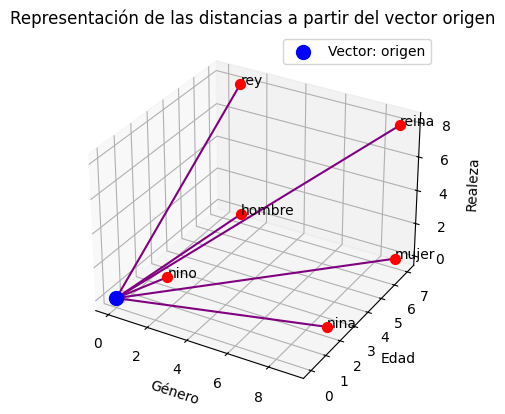

In [124]:
import numpy as np

# definiento vectores
rey = np.array([1,7,8])
hombre = np.array([1,7,0])
mujer = np.array([9,7,0])
reina= np.array([9,7,8])
niño = np.array([1,2,0])
niña = np.array([9,2,0])


# agrupando arrays en un diccionario
espacio_vectorial = {
    "rey": rey,
    "hombre": hombre,
    "mujer": mujer,
    "reina": reina,
    "nino": niño,
    "nina": niña
}

Utils.graficar_distancias(espacio_vectorial)

### **2) Definiendo las metricas para medir la similitud entre dos vectores**

#### **2.1) Distancia euclidiana**

Formula:

Se obtiene la norma del vector resultante de la resta de los vectores.

$$
\text{distancia} = \|A - B\|
$$

**Interpretación:** El resultado puede ir de: $[0, \infty)$, donde:
- Los resultados mas cercanos a cero se interpretaran como vectores mas cercanos entre si
- Mientras mas grande el  resultado se consideraran vectores mas lejanos entre si


#### **2.2) Similitud coseno**

Formula:

Se obtiene el producto punto de los vectores y se divide entre el producto de las normas de los vectores.

$$
\text{similitud} = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$$

In [125]:
import numpy as np

def get_similitud_coseno(vector_1, vector_2):
    return np.dot(vector_1, vector_2)/(np.linalg.norm(vector_1)*np.linalg.norm(vector_2))

def get_distancia_euclidiana(vector_1, vector_2):
    return np.linalg.norm(vector_1-vector_2)


### **3) Obteniendo todas las metricas de todas las combinaciones de los vectores y almacenandolas en la variable: "base_datos_vectorial"**


Aqui me gustaria explicar un poco mas de por que hice lo siguiente

#### **Explicacion 1:**

La variable **metricas_medicion** es un diccionario donde:
- Sus 'keys' representan el nombre de la metrica respectiva
- Sus 'values' son referencias a funciones, sin embargo, estas funciones deben cumplir con los siguientes criterios:
    - La funcion debe recibir dos parametros: vector_1 y vector_2
    - La funcion debe retornar un valor numerico

De esta manera, se pueden agregar mas metricas sin modificar el codigo existente.

#### **Explicacion 2:**


La funcion **get_base_datos_vectorial** se encarga de hacer lo siguiente:
- Obtener todas las combinaciones de los vectores definidos en el espacio vectorial
- Para cada combinacion, se calculan las metricas definidas en **metricas_medicion**
- Se ordenan las metricas de cada combinacion de menor a mayor
- Se almacenan los resultados en la variable **base_datos_vectorial**

Quizas te preguntes ¿por que se calculan las combinaciones de todos los vectores?

R= Esto lo hice para almacenar las metricas de todos los vectores sin tener que calcular nuevamente las metricas de las combinaciones ya calculadas y de esta manera como estaran guardadas en la variable **base_datos_vectorial** solo bastara por buscar el vector del cual se desea obtener todas sus metricas sin tener que hacer los calculos nuevamente.


### **Explicacion 3:**

Una vez explicadas la funcion y  la variable de metricas, procedere a explicar el codigo en general.El codigo obtiene todas las metricas de todas las combinaciones de los vectores y las almacena en la variable **base_datos_vectorial** posteriormente se guarda en un archivo json, llamado **base_datos_vectorial.json** el cual se vera de la siguiente manera:

```json
{
    "rey": {
        "distancia_euclidiana": {
            "hombre": 8.0,
            "reina": 8.0,
            "nino": 9.433981132056603,
            "mujer": 11.313708498984761,
            "nina": 12.36931687685298
        },
        "similitud_coseno": {
            "nina": 0.23365008722680572,
            "mujer": 0.47643525615380605,
            "nino": 0.6282808624375432,
            "hombre": 0.6622661785325218,
            "reina": 0.8203638980982453
        }
    },
    "hombre": {
        "distancia_euclidiana": {
            "nino": 5.0,
            "rey": 8.0,
            "mujer": 8.0,
            "nina": 9.433981132056603,
            "reina": 11.313708498984761
        },
        "similitud_coseno": {
            "nina": 0.3528038948697904,
            "reina": 0.588900775777499,
            "rey": 0.6622661785325218,
            "mujer": 0.7194014606174091,
            "nino": 0.9486832980505138
        }
    },
    "mujer": {
        "distancia_euclidiana": {
            "nina": 5.0,
            "hombre": 8.0,
            "reina": 8.0,
            "nino": 9.433981132056603,
            "rey": 11.313708498984761
        },
        "similitud_coseno": {
            "rey": 0.47643525615380605,
            "hombre": 0.7194014606174091,
            "reina": 0.8185982487053739,
            "nino": 0.9021342216356465,
            "nina": 0.9037378388935388
        }
    },
    "reina": {
        "distancia_euclidiana": {
            "rey": 8.0,
            "mujer": 8.0,
            "nina": 9.433981132056603,
            "hombre": 11.313708498984761,
            "nino": 12.36931687685298
        },
        "similitud_coseno": {
            "hombre": 0.588900775777499,
            "nino": 0.7384854939281258,
            "nina": 0.7397982122070302,
            "mujer": 0.8185982487053739,
            "rey": 0.8203638980982453
        }
    },
    "nino": {
        "distancia_euclidiana": {
            "hombre": 5.0,
            "nina": 8.0,
            "rey": 9.433981132056603,
            "mujer": 9.433981132056603,
            "reina": 12.36931687685298
        },
        "similitud_coseno": {
            "rey": 0.6282808624375432,
            "nina": 0.6305926250944657,
            "reina": 0.7384854939281258,
            "mujer": 0.9021342216356465,
            "hombre": 0.9486832980505138
        }
    },
    "nina": {
        "distancia_euclidiana": {
            "mujer": 5.0,
            "nino": 8.0,
            "hombre": 9.433981132056603,
            "reina": 9.433981132056603,
            "rey": 12.36931687685298
        },
        "similitud_coseno": {
            "rey": 0.23365008722680572,
            "hombre": 0.3528038948697904,
            "nino": 0.6305926250944657,
            "reina": 0.7397982122070302,
            "mujer": 0.9037378388935388
        }
    }
}


In [126]:
import json
from collections import defaultdict

metricas_medicion = {
    "distancia_euclidiana": get_distancia_euclidiana,
    "similitud_coseno": get_similitud_coseno
}


def get_base_datos_vectorial(espacio_vectorial,metricas_medicion):
    base_datos_vectorial = defaultdict(lambda: defaultdict(dict))
    metricas_medicion_result = defaultdict(lambda: defaultdict(dict))  
    numero_combinaciones, combinaciones = Utils.obtener_combinaciones(espacio_vectorial.keys(), 2)

    for combinacion in combinaciones:
        nombre_vector_1, nombre_vector_2 = combinacion
        for metrica_nombre, metrica_funcion in metricas_medicion.items():    
            metricas_medicion_result[metrica_nombre][combinacion] = metrica_funcion(
                vector_1=espacio_vectorial[nombre_vector_1],
                vector_2=espacio_vectorial[nombre_vector_2]
            )

    for metrica_nombre in metricas_medicion_result.keys():
        for combinacion, distancia in metricas_medicion_result[metrica_nombre].items():
            nombre_vector_1, nombre_vector_2 = combinacion
            base_datos_vectorial[nombre_vector_1][metrica_nombre][nombre_vector_2] = distancia
            base_datos_vectorial[nombre_vector_2][metrica_nombre][nombre_vector_1] = distancia

    # ordenando cada diccionario de la base de datos vectorial
    for nombre_vector in base_datos_vectorial:
        for metrica_nombre in base_datos_vectorial[nombre_vector].keys():
            base_datos_vectorial[nombre_vector][metrica_nombre] = dict(
                sorted(
                    base_datos_vectorial[nombre_vector][metrica_nombre].items(),
                    key=lambda x: x[1])
                )

    return base_datos_vectorial

base_datos_vectorial = get_base_datos_vectorial(espacio_vectorial,metricas_medicion)
base_datos_vectorial_json = json.dumps(base_datos_vectorial, indent=4)

with open("base_datos_vectorial.json", "w") as archivo:
    archivo.write(base_datos_vectorial_json)


### **4) Obteniendo todas las metricas de un vector en especifico**


Dado que ya se tiene la base de datos vectorial, se puede obtener todas las metricas de un vector en especifico, para esto se debe ingresar el nombre del vector en la variable **nombre_vector** y se imprimira en pantalla todas las metricas de dicho vector.

{
    "distancia_euclidiana": {
        "rey": 8.0,
        "mujer": 8.0,
        "nina": 9.433981132056603,
        "hombre": 11.313708498984761,
        "nino": 12.36931687685298
    },
    "similitud_coseno": {
        "hombre": 0.588900775777499,
        "nino": 0.7384854939281258,
        "nina": 0.7397982122070302,
        "mujer": 0.8185982487053739,
        "rey": 0.8203638980982453
    }
}


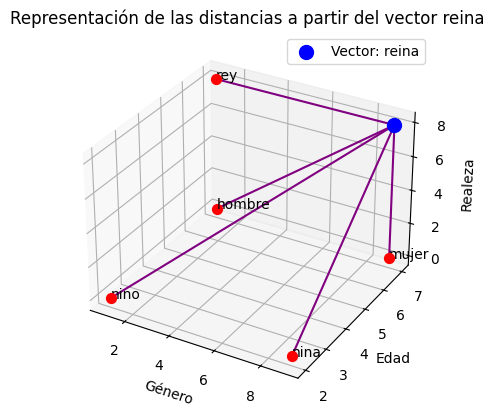

In [127]:
import json
 
#nombre_vector = input("Ingresa el nombre del vector: ")
nombre_vector = "reina"

if nombre_vector in base_datos_vectorial:
    metricas_medicion = base_datos_vectorial[nombre_vector]
    print(json.dumps(metricas_medicion, indent=4))
    Utils.graficar_distancias(espacio_vectorial,nombre_vector)
else:
    print(f"El vector {nombre_vector} no existe en la base de datos vectorial")
